# EDA_FE 과제
#### <font color='orange'> - 약간 매운맛

by YBIGTA 16기 DA Team 김지환

<img src='https://i.imgur.com/cqdVyfs.jpg'>


---
여러분은 Airbnb 런던 지사의 데이터 분석가입니다.

이번에 호스트들에게 적정한 방 가격을 책정해주는 프로젝트를 진행할 예정입니다.

이를 위해 기존에 런던에 있던 Airbnb 방 데이터를 분석할 것입니다.

각 문제에 대해 적절한 코드 혹은 답변을 제시해보세요.

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 코드. 버전에 따라 필요 없을 수도 있습니다.
import seaborn as sns

In [ ]:
#Object columns 값을 숫자형으로 바꿔주기 
object_columns = df.select_dtypes(include=['object'])
# T or F로 이루어진 컬럼은 0과 1로 바꿔주기
df.replace({'f': 0, 't': 1}, inplace=True)
# Property type 범주화를 위해 값의 분포를 확인
# 'property_type' 열의 상위 3개 값 출력
top5_property_type = df['property_type'].value_counts().head(5)
print(top5_property_type)

NameError: name 'df' is not defined

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = pd.read_csv('C:/Users/JW/Desktop/YBIGTA_24th/교육세션/0109 EDA-FE/airbnb_listings.csv', index_col=0)

C:\Users\JW\AppData\Local\Temp\ipykernel_32628\1610696904.py:1: DtypeWarning: Columns (25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/JW/Desktop/YBIGTA_24th/교육세션/0109 EDA-FE/airbnb_listings.csv', index_col=0)


# EDA

### 1) 전체 데이터 확인

- #### <font color='orange'> Q1. 상위 5개의 데이터를 확인해보세요. 컬럼 수가 많으니 모든 컬럼을 표시하도록 조정하세요. </font>

In [7]:
# Q1
pd.set_option('display.max_columns', None)
df.head()

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2060,a few days or more,22%,50%,f,0.0,0.0,['reviews'],t,f,Manhattan,40.85722,-73.93790,t,Other,Private room,2,NaN,1.0,2.0,Real Bed,"{Internet,Wifi}",NaN,100,NaN,NaN,NaN,1,$0.00,1,730,t,30,60,90,365,1,0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,0.01
1,2595,within a day,87%,38%,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,Manhattan,40.75362,-73.98377,f,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",NaN,225,"$1,995.00",NaN,$350.00,1,$0.00,7,1125,t,4,34,64,339,48,5,94.0,9.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,0.38
2,3831,within an hour,83%,96%,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,Brooklyn,40.68514,-73.95976,t,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",500.0,89,$575.00,"$2,100.00",$500.00,1,$0.00,1,730,t,6,10,13,151,313,69,90.0,9.0,9.0,10.0,10.0,10.0,8.0,f,NaN,NaN,f,f,moderate,f,f,4.71
3,5099,NaN,NaN,71%,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,Manhattan,40.74767,-73.97500,f,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,200,NaN,NaN,$300.00,2,$100.00,3,21,t,0,0,0,0,78,8,90.0,10.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,moderate,t,t,0.59
4,5114,within a day,50%,NaN,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.71910,-73.99040,t,Apartment,Private room,2,NaN,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,E...",NaN,94,NaN,NaN,NaN,1,$13.00,1,730,t,30,60,90,109,75,0,94.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,0.56


---
### 2) 결측치 확인

- #### <font color='orange'> Q2. 각 컬럼의 결측치를 확인하고, 결측치가 많은 순서대로 결측치 비율과 함께 표로 나타내보세요.
<font color='orange'> (결측치 0개인 컬럼은 나타내지 마세요)

In [ ]:
# Q2
missing_values = df.isnull().sum()
missing_values_sorted = missing_values.sort_values(ascending=False)
missing_values_sorted = missing_values_sorted[missing_values_sorted > 0]
print(missing_values_sorted)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 50796 entries, 0 to 50795
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_response_time                31790 non-null  object 
 2   host_response_rate                31790 non-null  object 
 3   host_acceptance_rate              36781 non-null  object 
 4   host_is_superhost                 50791 non-null  object 
 5   host_listings_count               50791 non-null  float64
 6   host_total_listings_count         50791 non-null  float64
 7   host_verifications                50796 non-null  object 
 8   host_has_profile_pic              50791 non-null  object 
 9   host_identity_verified            50791 non-null  object 
 10  neighborhood                      50796 non-null  object 
 11  latitude                          50796 non-null  float64
 12  long

In [41]:
df2=pd.DataFrame(missing_values_sorted,columns=['missing_num'])
missing_percent = df2['missing_num']/50781*100
df2['missing_%'] = missing_percent.round(2)
df2

KeyError: 'missing_%'

In [42]:
#Q2
df2=pd.DataFrame(missing_values_sorted,columns=['missing_num'])
missing_percent = df2['missing_num']/50781*100
df2['missing_%'] = missing_percent.round(2)
df2

,missing_num,missing_%
jurisdiction_names,50781,100.00
license,50759,99.96
square_feet,50407,99.26
monthly_price,46119,90.82
weekly_price,45411,89.43
host_response_time,19006,37.43
host_response_rate,19006,37.43
security_deposit,17325,34.12
host_acceptance_rate,14015,27.60
review_scores_value,11482,22.61


- #### <font color='orange'> Q3. 결측치가 있는 컬럼과 결측치 비율을 보기쉽게 그래프로 나타내 보세요.

In [59]:
# Q3
plt.figure(figsize=(100,100))
plt.barh(df2.index, df2['missing_%'])
plt.xlabel('Missing Value Percentage')
plt.ylabel('Columns')
plt.title('Percentage of Missing Values in Each Column')
plt.xticks(fontsize=100)
plt.yticks(fontsize=100)
plt.show()

- #### <font color='orange'> Q4. 결측치가 적은 beds 컬럼을 좀 더 자세히 살펴보겠습니다.
  #### <font color='orange'> 'beds' 컬럼이 결측치인 데이터의 상위 5개를 출력해주세요.

In [68]:
# Q4
missing_beds = df[df['beds'].isnull()]
missing_beds.head()

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
808,321845,NaN,NaN,NaN,f,0.0,0.0,['email'],t,f,Manhattan,40.70850,-74.01795,t,Apartment,Private room,2,NaN,1.0,NaN,Real Bed,{},NaN,150,$500.00,"$1,600.00",NaN,1,$0.00,1,1125,t,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,NaN
1002,468613,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Manhattan,40.72152,-73.99279,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,1300,NaN,NaN,NaN,1,$0.00,1,1125,t,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,NaN
1058,499249,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,f,Brooklyn,40.70528,-73.95756,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,190,NaN,NaN,$0.00,1,$100.00,1,218,t,30,60,90,365,1,0,NaN,10.0,8.0,10.0,10.0,10.0,10.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,0.01
1074,505231,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.77799,-73.95223,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,80,$700.00,"$3,000.00",NaN,1,$0.00,1,60,t,0,0,0,0,1,0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,moderate,f,f,0.01
1208,587519,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,Brooklyn,40.71099,-73.95217,t,Apartment,Private room,1,1.0,1.0,NaN,Real Bed,{},NaN,48,NaN,NaN,NaN,1,$0.00,5,30,t,0,0,0,0,1,0,80.0,6.0,6.0,10.0,10.0,10.0,6.0,f,NaN,NaN,f,f,flexible,f,f,0.02


---
### 3) 범주형 변수 확인
<font color='gray'> - 편의를 위해 결측치가 있는 컬럼을 모두 제거하고 진행하겠습니다.

In [69]:
drop_col = ['jurisdiction_names', 'license', 'square_feet', 'monthly_price',
       'weekly_price', 'host_response_rate', 'host_response_time',
       'security_deposit', 'host_acceptance_rate', 'review_scores_location',
       'review_scores_value', 'review_scores_checkin',
       'review_scores_accuracy', 'review_scores_communication',
       'review_scores_cleanliness', 'review_scores_rating',
       'reviews_per_month', 'beds']

In [70]:
df = df.drop(columns=drop_col)

- #### 각 컬럼별 변수 타입 확인

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50796 entries, 0 to 50795
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_is_superhost                 50791 non-null  object 
 2   host_listings_count               50791 non-null  float64
 3   host_total_listings_count         50791 non-null  float64
 4   host_verifications                50791 non-null  object 
 5   host_has_profile_pic              50791 non-null  object 
 6   host_identity_verified            50791 non-null  object 
 7   neighborhood                      50796 non-null  object 
 8   latitude                          50796 non-null  float64
 9   longitude                         50796 non-null  float64
 10  is_location_exact                 50796 non-null  object 
 11  property_type                     50796 non-null  object 
 12  room_type

- #### <font color='orange'> Q5. Room Type 에는 어떤 것들이 있는지 살펴보겠습니다.
#### <font color='orange'> room_type의 종류별 갯수에 대한 그래프를 그려주세요.

<Axes: >

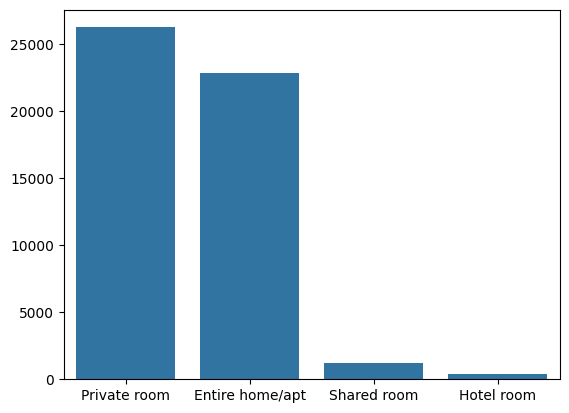

In [82]:
# Q5
room_type_list=df['room_type'].unique().tolist()
room_type_counts = df['room_type'].value_counts()

sns.barplot(x=room_type_list, y=room_type_counts.values)

- #### <font color='orange'> Q6. 위 그래프의 세로축이 갯수가 아닌 비율을 나타내도록 재구성해보세요.

<Axes: xlabel='room_type'>

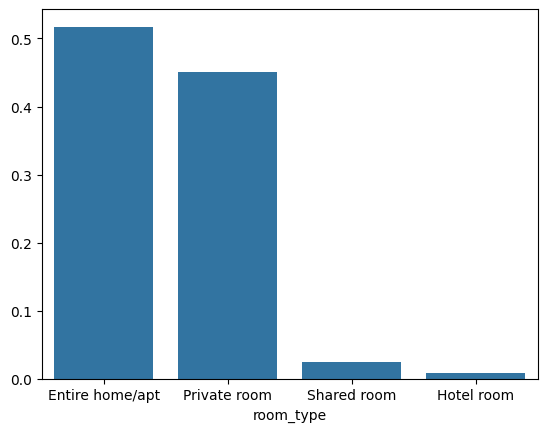

In [83]:
# Q6
room_type_ratio = df['room_type'].value_counts() / int(len(df))
sns.barplot(x=room_type_ratio.index, y=room_type_ratio.values)

- #### <font color='orange'> Q7. 각 지역별로 room_type의 비율이 어땠는 지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 room_type의 갯수가 어땠는지 보여주세요.    

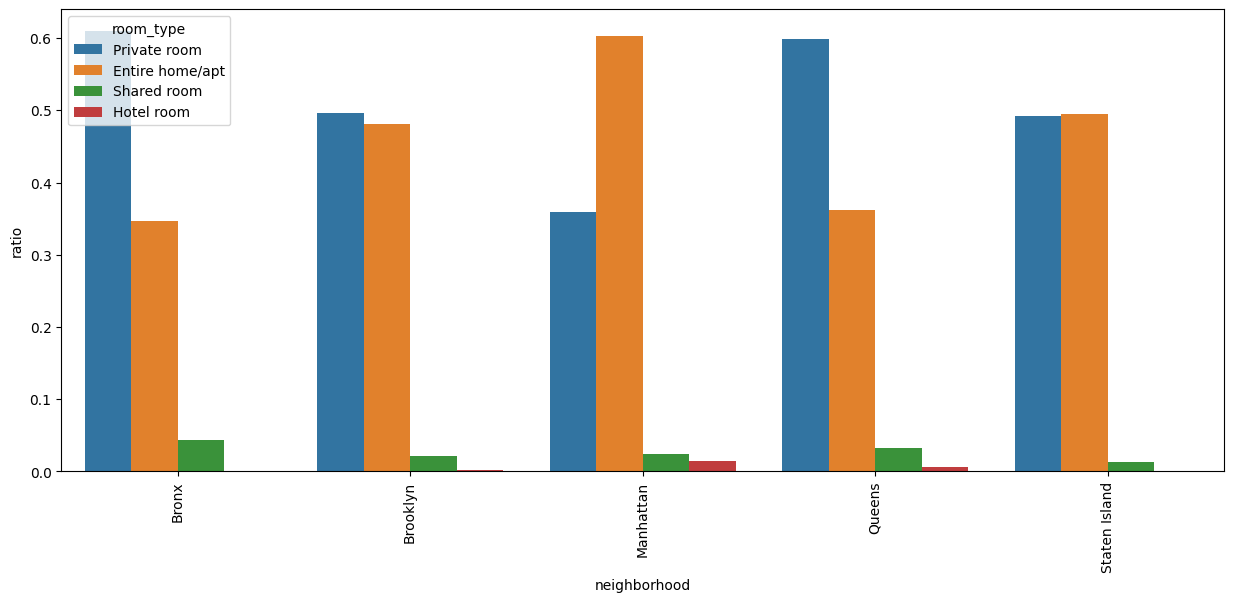

In [91]:
# Q7
# Plot the data
room_type_ratio_by_neighborhood = df.groupby('neighborhood')['room_type'].value_counts() / df.groupby('neighborhood')['room_type'].count()


room_type_ratio_by_neighborhood = room_type_ratio_by_neighborhood.reset_index(name='ratio')
plt.figure(figsize=(15, 6))
sns.barplot(x='neighborhood', y='ratio', hue='room_type', data=room_type_ratio_by_neighborhood)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

- #### <font color='orange'> Q8. 각 지역별로 가격의 분포가 어떤지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 가격의 분포를 보여주세요.

C:\Users\JW\AppData\Local\Temp\ipykernel_52648\4212879740.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='neighborhood', y='price', data=df, jitter=True, palette='Set2')


<Axes: xlabel='neighborhood', ylabel='price'>

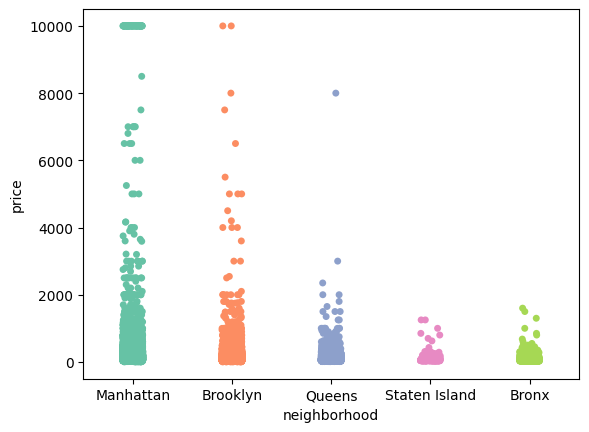

In [98]:
# Q8
# plt.figure() 여기부턴 직접 사이즈 조절해보세요
sns.stripplot(x='neighborhood', y='price', data=df, jitter=True, palette='Set2')

- #### <font color='orange'> Q9. 위 그래프들로부터 알 수 있는 사실은 무엇인가요? 그 이유는 무엇이라고 생각하시나요?

In [ ]:
# Q9
Bronx는 임대료가 매우 저렴함, Manhattan은 임대료가 상대적으로 촘촘하게 분포함
1. Bronx의 경우 그래프상에 가격이 2000달러 이상인 곳이 존재하지 않음
2. Manhattan의 그래프상에 2000~10000달러 사이에도 많은 데이터가 존재하기때문

---
### 4) 연속형 변수 확인

- #### <font color='orange'> Q10. 각 방의 수용가능인원의 분포를 알고싶습니다.
#### <font color='orange'> 'accommodates' 칼럼에 대한 히스토그램을 그려주세요.

C:\Users\JW\AppData\Local\Temp\ipykernel_52648\4057788997.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['accommodates'], kde=False, bins=20)


<Axes: xlabel='accommodates'>

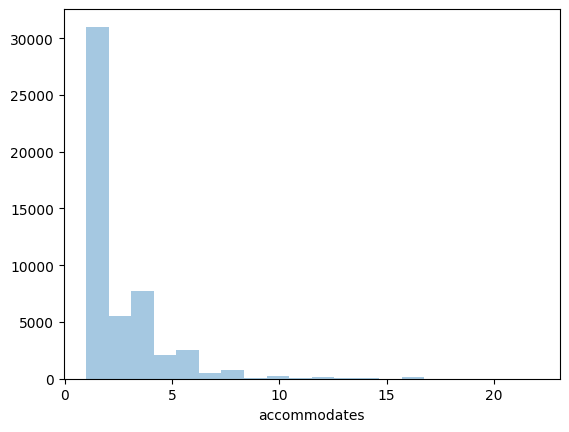

In [101]:
# Q10
sns.distplot(df['accommodates'], kde=False, bins=20)

- #### <font color='orange'> Q11. 각 방의 가격의 분포를 알고 싶습니다.
#### <font color='orange'> 'price' 칼럼에 대한 히스토그램을 그려주세요. 범위는 0~1000까지만 보여주세요.

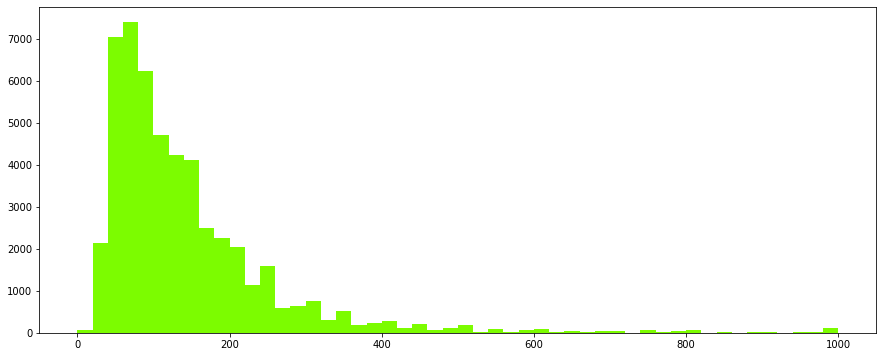

In [ ]:
# Q11
filtered_price = df[df['price'] <= 1000]['price']
sns.distplot(filtered_price, kde=False, bins=30)

* **굵은 텍스트** Q3 hint

<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>



---
### 5) Feature Engineering

feature에 대한 전처리를 하기 이전에 결측치가 있는 column을 모두 제거했는데, 다시 초기 상태로 되돌리고 진행하겠습니다.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 코드. 버전에 따라 필요 없을 수도 있습니다.
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/JW/Desktop/YBIGTA_24th/교육세션/0109 EDA-FE/airbnb_listings.csv', index_col=0)

C:\Users\JW\AppData\Local\Temp\ipykernel_39920\1610696904.py:1: DtypeWarning: Columns (25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/JW/Desktop/YBIGTA_24th/교육세션/0109 EDA-FE/airbnb_listings.csv', index_col=0)


- #### <font color='orange'> Q12. 결측치에 대한 처리를 하고 싶습니다.
#### <font color='orange'> 주어진 모든 column들에 대하여 결측치가 25%이상인 경우에는 column을 drop하고 10%이상 25%미만인 경우에는 결측치가 있는 row만 drop하고, 10%미만인 경우에는 중앙값으로 대체해주세요.

In [3]:
#Q12
# 결측치 우선 계산
missing_percent = df.isnull().sum() / len(df)

# 25%이상 결측치는 제거
df = df.drop(columns=missing_percent[missing_percent > 0.25].index)

# 업데이트된 결측치 계산
missing_percent = df.isnull().sum() / len(df)

# 10%이상 25%미만 결측치 컬럼 제거
for col in missing_percent[(missing_percent >= 0.10) & (missing_percent < 0.25)].index:
    df = df[df[col].notna()]

# 10%미만 결측치는 중앙값으로 대체

# 숫자형 컬럼만 선택
numeric_cols = df.select_dtypes(include=[np.number]).columns

# 10% 미만 결측치는 중앙값으로 대체
for col in missing_percent[missing_percent < 0.10].index:
    if col in numeric_cols:
        df[col] = df[col].fillna(df[col].median())

### 범주, 문자형 데이터 인코딩 

In [4]:
#Object columns 값을 숫자형으로 바꿔주기 
object_columns = df.select_dtypes(include=['object'])
# T or F로 이루어진 컬럼은 0과 1로 바꿔주기
df.replace({'f': 0, 't': 1}, inplace=True)
import numpy as np
# 'property_type' 열의 값이 'Apartment'이면 0, 'House'이면 1, 그 외의 값이면 2로 설정
df['property_type'] = np.where(df['property_type'] == 'Apartment', 0,
                               np.where(df['property_type'].isin(['House', 'Townhouse']), 1, 2))
# 'bed_type' 열의 값이 'Real_bed'이면 0,  그 외의 값이면 1로
df['bed_type'] = np.where(df['bed_type'] == 'Real Bed', 0,1)
# 'room_type' 열의 값이 'Entire home/apt'이면 0,  'private room'이면 1, 외에는 2
df['room_type'] = np.where(df['room_type'] == 'Entire home/apt', 0,
                               np.where(df['room_type']=='private room', 1, 2))
# 'extra_people' 열에서 '$' 문자 제거 후 숫자형으로 변환
df['extra_people'] = df['extra_people'].str.replace('$', '')
df['extra_people'] = df['extra_people'].astype(float)
# 'cancellation_polcy'열에서 문자열 값을 숫자로 변환
df['cancellation_policy'] = np.where(df['cancellation_policy'] == 'flexible', 0,
                               np.where(df['cancellation_policy'].isin(['strict', 'super_strict_30','super_strict_60','strict_14_with_grace_period']), 1, 2))
df['neighborhood'] = df['neighborhood'].replace({'Manhattan': 0, 'Brooklyn': 1, 'Queens': 2, 'Staten Island':3 ,'Bronx': 4})  
# 'host_verifications' 문자열에서 쉼표의 개수를 세고 1을 더하여 문자열을 숫자로 변환
df['host_verifications'] = df['host_verifications'].apply(lambda x: x.count(',') + 1 if isinstance(x, str) else 0)
# 'amenities' 열의 각 값이 'Wifi'를 포함하는지 확인하고, 결과를 0과 1로 변환
df['amenities'] = df['amenities'].apply(lambda x: 'Wifi' in x).astype(int)                                   

In [5]:
df=df.drop(['id','latitude','longitude','has_availability','availability_30','availability_60','availability_90','availability_365','minimum_nights','maximum_nights'],axis=1)

# 결측지 값 처리

In [6]:
#NaN값 존재하기 때문에 결측치 처리할 수 있는 simpleimputer 사용
from sklearn.impute import SimpleImputer
# SimpleImputer 객체 생성
imputer = SimpleImputer(strategy='mean')
# NaN 값을 평균 값으로 채움
df_imputed = imputer.fit_transform(df)
# numpy.ndarray를 pandas.DataFrame으로 변환
df = pd.DataFrame(df_imputed, columns=df.columns)

## 스케일링

In [8]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# 데이터 스케일링
scaled_array = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled_array, columns=df.columns)
 # X,Y값 분리
X = df_scaled.drop('price', axis=1)
y = df_scaled[['price']]



- #### <font color='orange'> Q13. 앞서 진행한 EDA를 바탕으로 FE를 진행하고자 합니다..
#### <font color='orange'> 총 3개의 FE를 진행하시고, 해당 FE를 진행한 이유에 대해 **간단히** 작성해주세요.


1. SelectFromModel, SelectKbest, RFE방식을 활용하였습니다.
Dataset의 성격이 범주, 숫자가 섞여있기에 분산을 활용하여 차원을 축소하는 것보다 가격에 필요한 변수만 남기기 위해 영향력이 없는 변수들을 제거하는 특성방법이 더 효과적일 것으로 판단하였습니다.  

In [14]:
#Q13-1) SeletFromModel 활용한 FE

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

# 회귀 모델 객체 생성
regressor = RandomForestRegressor()

# SelectFromModel 객체 생성
selector = SelectFromModel(regressor)

# 특성 선택 적용
X_new = selector.fit_transform(X, y)

# 선택된 특성의 인덱스 얻기
selected_features = selector.get_support(indices=True)

# 선택된 특성의 이름 얻기
feature_names = X.columns[selected_features]

print(feature_names)

c:\Users\JW\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Index(['host_listings_count', 'host_total_listings_count',
       'host_verifications', 'accommodates', 'bathrooms', 'guests_included',
       'extra_people', 'number_of_reviews', 'number_of_reviews_ltm',
       'review_scores_rating', 'review_scores_accuracy', 'cancellation_policy',
       'reviews_per_month'],
      dtype='object')


In [ ]:
#Q13-2) SlecetKBest를 사용하여 특성 선택
from sklearn.feature_selection import SelectKBest, f_classif
# SelectKBest 객체 생성
selector = SelectKBest(score_func=f_classif, k=10)
# 특성 선택 적용
X_new = selector.fit_transform(X, y)
# 선택된 특성의 인덱스 얻기
selected_features = selector.get_support(indices=True)

# 선택된 특성의 이름 얻기
feature_names = X.columns[selected_features]

print(feature_names)

In [13]:
#Q13-3) RFE를 사용하여 특성 선택
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
# 모델 생성
estimator = SVR(kernel="linear")

# RFE 객체 생성
selector = RFE(estimator, n_features_to_select=10, step=1)

# 특성 선택
X_transformed = selector.fit_transform(X, y)

# 선택된 특성 출력
selected_feat= X.columns[(selector.get_support())]
print(selected_feat)

c:\Users\JW\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\JW\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\JW\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\JW\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWar

Index(['host_verifications', 'neighborhood', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'number_of_reviews', 'review_scores_rating',
       'review_scores_location', 'reviews_per_month'],
      dtype='object')


---

EDA는 언뜻보면 불필요해 보이는 과정이지만, 실제 데이터를 다룰때 매우매우 중요한 과정입니다.

때문에 기본적인 개념 및 시각화 방법은 숙지해 두시는 것이 좋습니다!

또한 FE를 통하여 여러분들이 실제로 필요한 모델에 필요한 변수 형태를 띄게 변수를 바꿔주는 과정 또한 필수적인 과정이니, 다양한 방법의 FE 역시 숙지해 두시는 게 좋습니다

---